1. Transformación de Datos
* Crea nuevas columnas: Basándonos en los datos existentes, crea nuevas columnas que sean útiles para el análisis. Por ejemplo, calcula el * ingreso total por venta y normaliza las ventas.
* Clasifica los datos: Crea una columna que clasifique las ventas en categorías significativas (e.g., ‘Alta’, ‘Media’, ‘Baja’).
2. Agrupación y Agregación
* Agrupación por múltiples columnas: Realiza agrupaciones por categorías como producto y tienda, producto y mes, etc.
* Aplicar funciones de agregación: Utiliza funciones como sum, mean, count, min, max, std, y var para obtener estadísticas descriptivas de cada grupo.
3. Análisis Personalizado con apply
* Función personalizada: Aplica funciones personalizadas para realizar análisis específicos que no se pueden lograr con las funciones de agregación estándar.
* Ejemplo de uso avanzado: Calcula la desviación de cada venta respecto a la media de su grupo.
4. Documentación
* Comentarios claros: Documenta claramente cada paso del análisis, explicando qué se hizo y por qué se hizo.
* Código legible: Asegúrate de que el código sea legible y esté bien comentado.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import pandas as pd

# Ruta del archivo CSV en Google Drive
# Cambiar el enlace a formato de descarga directa
ruta_archivo = 'https://drive.google.com/uc?id=1d1r6n5uy4YqPLKZmDjno27FhLMaYD363'

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv(ruta_archivo)




1. Transformación de Datos
* Crea nuevas columnas: Basándonos en los datos existentes, crea nuevas columnas que sean útiles para el análisis. Por ejemplo, calcula el ingreso total por venta y normaliza las ventas.

In [ ]:
df['Total Sales'] = df['Quantity'] * df['Price per Unit']

In [ ]:
df['Normalized Sales'] = (df['Total Sales'] - df['Total Sales'].min()) / (df['Total Sales'].max() - df['Total Sales'].min())
print(df[['Total Sales', 'Normalized Sales']].head())

   Total Sales  Normalized Sales
0          150          0.063291
1         1000          0.493671
2           30          0.002532
3          500          0.240506
4          100          0.037975


Clasifica los datos: Crea una columna que clasifique las ventas en categorías significativas (e.g., ‘Alta’, ‘Media’, ‘Baja’).

In [ ]:
# Función para clasificar las ventas en 'Alta', 'Media', 'Baja' según los cuartiles
def classify_sales(sales):
    if sales >= df['Total Sales'].quantile(0.75):
        return 'Alta'
    elif sales >= df['Total Sales'].quantile(0.25):
        return 'Media'
    else:
        return 'Baja'

In [ ]:
# Crear nueva columna con la clasificación de ventas
df['Sales Category'] = df['Total Sales'].apply(classify_sales)

# Mostrar las primeras filas para verificar
print(df[['Total Sales', 'Sales Category']].head())

   Total Sales Sales Category
0          150          Media
1         1000           Alta
2           30           Baja
3          500          Media
4          100          Media


2. Agrupación y Agregación
Agrupación por múltiples columnas: Realiza agrupaciones por categorías como producto y tienda, producto y mes, etc.

In [ ]:
# Convertir la columna de fechas a formato datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extraer el mes de la fecha
df['Month'] = df['Date'].dt.to_period('M')

# Agrupar por 'Product Category' y 'Month'
grouped_df = df.groupby(['Product Category', 'Month'])

# Mostrar la cantidad de elementos en cada grupo
print(grouped_df.size().head())

Product Category  Month  
Beauty            2023-01    25
                  2023-02    26
                  2023-03    21
                  2023-04    29
                  2023-05    28
dtype: int64


In [ ]:
# Aplicar funciones de agregación para obtener estadísticas descriptivas por 'Product Category'
aggregated_stats = df.groupby('Product Category').agg({
    'Quantity': ['sum', 'mean', 'count', 'min', 'max', 'std', 'var'],
    'Price per Unit': ['mean', 'min', 'max', 'std', 'var'],
    'Total Amount': ['sum', 'mean', 'min', 'max', 'std', 'var']
})

# Mostrar el resultado de las estadísticas descriptivas
print(aggregated_stats)




                 Quantity                                              \
                      sum      mean count min max       std       var   
Product Category                                                        
Beauty                771  2.511401   307   1   4  1.100668  1.211471   
Clothing              894  2.547009   351   1   4  1.142647  1.305641   
Electronics           849  2.482456   342   1   4  1.153084  1.329603   

                 Price per Unit                                     \
                           mean min  max         std           var   
Product Category                                                     
Beauty               184.055375  25  500  194.929399  37997.470780   
Clothing             174.287749  25  500  186.017065  34602.348392   
Electronics          181.900585  25  500  189.049673  35739.778944   

                 Total Amount                                                   
                          sum        mean min   max        

Análisis Personalizado con apply
Función personalizada: Aplica funciones personalizadas para realizar análisis específicos que no se pueden lograr con las funciones de agregación estándar.

In [ ]:
# Función personalizada para calcular la desviación respecto a la media de su grupo
def deviation_from_mean(x):
    return x - x.mean()

# Aplicar la función personalizada sobre 'Total Sales' para calcular la desviación de cada venta
df['Deviation from Group Mean'] = grouped_df['Total Sales'].transform(deviation_from_mean)

# Mostrar las primeras filas para verificar la desviación
print(df[['Total Sales', 'Deviation from Group Mean']].head())

   Total Sales  Deviation from Group Mean
0          150                -238.000000
1         1000                 558.787879
2           30                -365.800000
3          500                  28.243243
4          100                -344.642857


In [5]:
print(df)

     Transaction ID        Date Customer ID  Gender  Age Product Category  \
0                 1  2023-11-24     CUST001    Male   34           Beauty   
1                 2  2023-02-27     CUST002  Female   26         Clothing   
2                 3  2023-01-13     CUST003    Male   50      Electronics   
3                 4  2023-05-21     CUST004    Male   37         Clothing   
4                 5  2023-05-06     CUST005    Male   30           Beauty   
..              ...         ...         ...     ...  ...              ...   
995             996  2023-05-16     CUST996    Male   62         Clothing   
996             997  2023-11-17     CUST997    Male   52           Beauty   
997             998  2023-10-29     CUST998  Female   23           Beauty   
998             999  2023-12-05     CUST999  Female   36      Electronics   
999            1000  2023-04-12    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  Total Amount  
0           3              50

PARTE 4

Parte IV: Análisis Exploratorio de Datos (EDA) y Visualización

En esta cuarta parte del proyecto, aplicaremos técnicas avanzadas de análisis exploratorio de datos (EDA) y visualización para comprender mejor el conjunto de datos de ventas de la tienda de retail. Utilizaremos Python, Pandas y Matplotlib para explorar y visualizar los datos, identificar patrones y tendencias, y preparar los datos para un análisis más profundo.

Instrucciones

Continuar desde la Parte III
Asegúrate de tener el repositorio de GitHub clonado localmente y el dataset ya limpiado y preparado desde la Parte III.
Análisis Descriptivo y Visualización
Calcula estadísticas descriptivas básicas para comprender mejor las características de los datos.
Utiliza histogramas y boxplots para visualizar la distribución de las variables numéricas clave.
Crea gráficos de líneas para mostrar las tendencias de ventas a lo largo del tiempo.
Utiliza gráficos de dispersión para analizar la relación entre diferentes variables.
Combina histogramas y boxplots para visualizar la distribución de las ventas y detectar valores atípicos.
Generar un Pull Request en GitHub
Después de completar el análisis y las visualizaciones, sube los cambios a una nueva rama en tu repositorio de GitHub y genera un Pull Request (PR) para revisión.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuraciones de estilo
sns.set(style="whitegrid")


Cargar el Conjunto de Datos

Cargamos el conjunto de datos que ya has preparado en la Parte III.

In [4]:
#imprimo el df modificado con las cosas que hice anteriormente en el proyecto parte 3 con el fin de ver que están reflejados los cambios
print(df)




     Transaction ID        Date Customer ID  Gender  Age Product Category  \
0                 1  2023-11-24     CUST001    Male   34           Beauty   
1                 2  2023-02-27     CUST002  Female   26         Clothing   
2                 3  2023-01-13     CUST003    Male   50      Electronics   
3                 4  2023-05-21     CUST004    Male   37         Clothing   
4                 5  2023-05-06     CUST005    Male   30           Beauty   
..              ...         ...         ...     ...  ...              ...   
995             996  2023-05-16     CUST996    Male   62         Clothing   
996             997  2023-11-17     CUST997    Male   52           Beauty   
997             998  2023-10-29     CUST998  Female   23           Beauty   
998             999  2023-12-05     CUST999  Female   36      Electronics   
999            1000  2023-04-12    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  Total Amount  
0           3              50

Estadísticas Descriptivas

Calcula las estadísticas descriptivas básicas.

In [8]:
desc_stats = df.describe(include='all')
print(desc_stats)
# conclusiones:
# lass estadísticas descriptivas revelaron que el monto total de ventas tiene un rango amplio,
# con algunos valores atípicos que podrían influir en el análisis.



        Transaction ID        Date Customer ID  Gender         Age  \
count      1000.000000        1000        1000    1000  1000.00000   
unique             NaN         345        1000       2         NaN   
top                NaN  2023-05-16     CUST001  Female         NaN   
freq               NaN          11           1     510         NaN   
mean        500.500000         NaN         NaN     NaN    41.39200   
std         288.819436         NaN         NaN     NaN    13.68143   
min           1.000000         NaN         NaN     NaN    18.00000   
25%         250.750000         NaN         NaN     NaN    29.00000   
50%         500.500000         NaN         NaN     NaN    42.00000   
75%         750.250000         NaN         NaN     NaN    53.00000   
max        1000.000000         NaN         NaN     NaN    64.00000   

       Product Category     Quantity  Price per Unit  Total Amount  
count              1000  1000.000000     1000.000000   1000.000000  
unique               

Visualización con Histogramas y Boxplots

<ipython-input-9-cb358e51f5f9>:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 2)


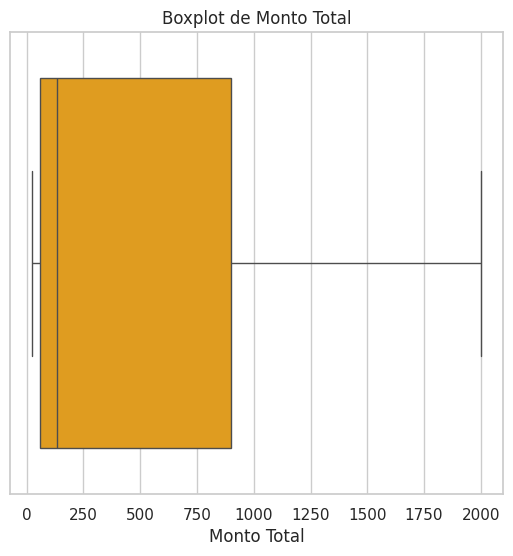

In [9]:
plt.figure(figsize=(14, 6))

# Histograma
sns.histplot(df['Total Amount'], bins=30, kde=True, color='blue')
plt.title('Distribución de Monto Total')
plt.xlabel('Monto Total')
plt.ylabel('Frecuencia')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Total Amount'], color='orange')
plt.title('Boxplot de Monto Total')
plt.xlabel('Monto Total')
plt.show()

# Conclusiones:
# La distribución de los montos totales mostró que la mayoría de las ventas se concentran en un rango inferior,
# mientras que el boxplot indicó la presencia de varios valores atípicos.


GRáficos de líneas

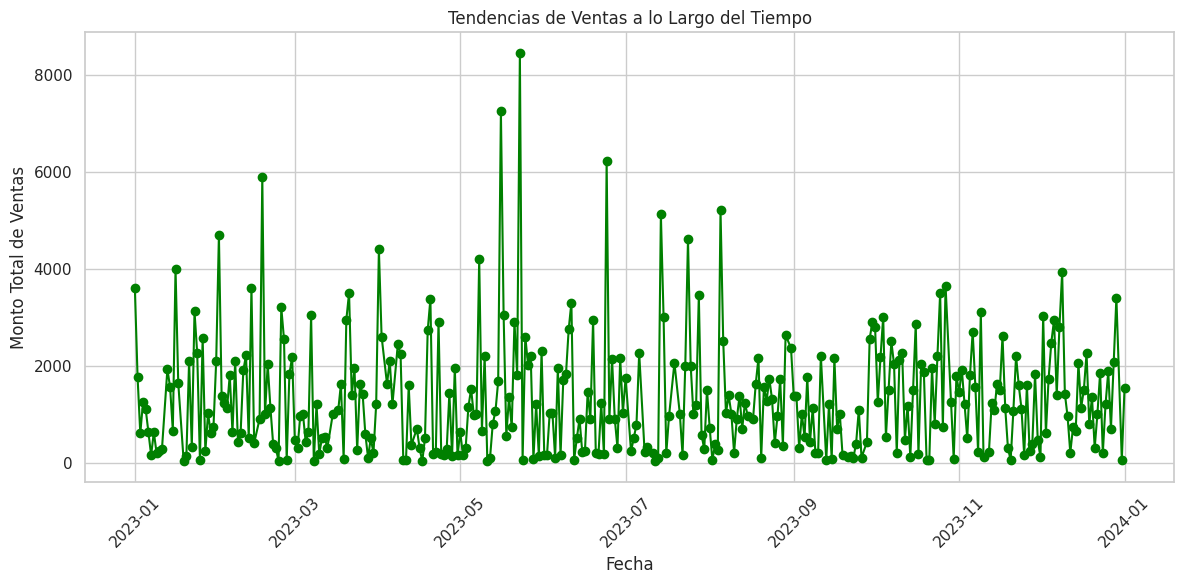

In [10]:
df['Date'] = pd.to_datetime(df['Date'])
ventas_tiempo = df.groupby('Date')['Total Amount'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(ventas_tiempo['Date'], ventas_tiempo['Total Amount'], marker='o', color='green')
plt.title('Tendencias de Ventas a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Monto Total de Ventas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Conclusiones:
# El gráfico de líneas mostró picos en las ventas en ciertas fechas,
# lo que podría estar relacionado con promociones o eventos especiales.

Gráficos de Dispersión

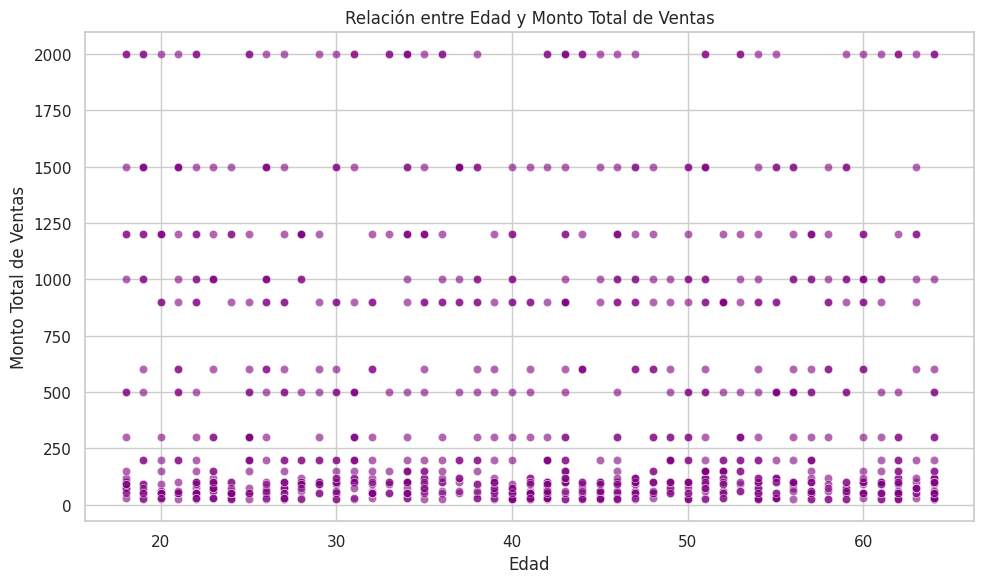

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Total Amount', data=df, alpha=0.6, color='purple')
plt.title('Relación entre Edad y Monto Total de Ventas')
plt.xlabel('Edad')
plt.ylabel('Monto Total de Ventas')
plt.tight_layout()
plt.show()

# Conclusiones:
# La relación entre la edad y el monto total de ventas mostró que hay una tendencia a que los clientes mayores
# realicen compras de mayor valor, aunque con bastante variabilidad.


In [ ]:
Graficos Combinados

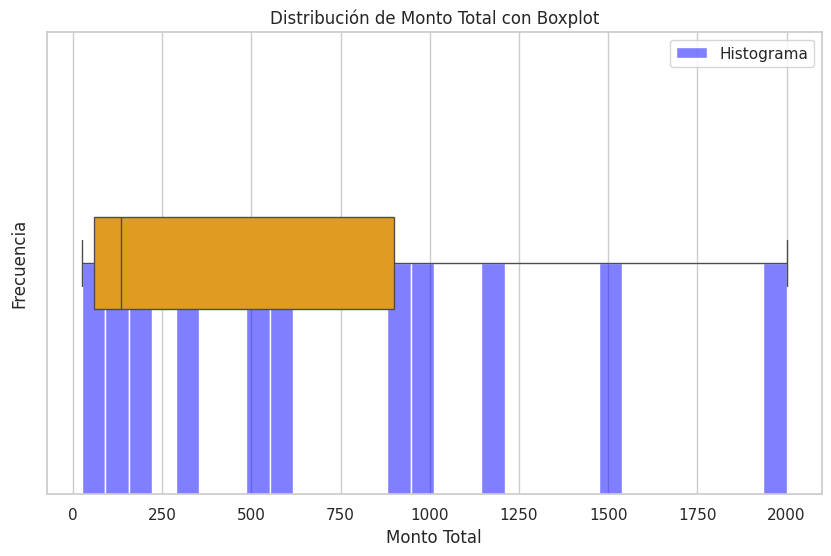

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Amount'], bins=30, kde=True, color='blue', label='Histograma')
sns.boxplot(x=df['Total Amount'], color='orange', width=0.2)

plt.title('Distribución de Monto Total con Boxplot')
plt.xlabel('Monto Total')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

# Conclusiones:
# Esta visualización combinada destacó la presencia de valores atípicos
# y la distribución general del monto total, lo que me permitió tener una mejor perspectiva de los datos.
